# Final Report Generator
## Waste Classification Model Comparison

**Purpose:** Aggregate and compare results from all trained models

**Models Evaluated:**
- EfficientNetB2 (TensorFlow)
- ConvNeXt-Tiny (PyTorch)
- ViT-B16 (PyTorch)

**Experiments:**
- Preprocessed Dataset
- Raw Dataset

---
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


---
## 2. Load Results from CSV

In [2]:
# Load final_results.csv
results_file = 'final_results.csv'

if not os.path.exists(results_file):
    print(f"❌ Error: {results_file} not found!")
    print("Please run the model training notebooks first to generate results.")
else:
    df = pd.read_csv(results_file)
    print(f"✓ Loaded {len(df)} results from {results_file}\n")
    print("Preview of raw data:")
    display(df.head(10))

✓ Loaded 21 results from final_results.csv

Preview of raw data:


,timestamp,model_name,experiment_type,accuracy,precision,recall,f1,loss,additional_info
0,2026-02-02 07:12:27,MobileNetV3-Large,Preprocessed,0.6398,0.6518,0.6323,0.6419,1.2183,NaN
1,2026-02-02 07:13:01,MobileNetV3-Large,Preprocessed_on_Raw,0.7111,0.7143,0.7036,0.7089,1.1396,NaN
2,2026-02-02 16:06:09,MobileNetV3-Large,Raw,0.7223,0.7297,0.7092,0.7193,0.9189,NaN
3,2026-02-02 4:22,EfficientNetB2,Preprocessed,0.5760,0.5918,0.5760,0.5764,1.4235,NaN
4,2026-02-02 5:04,EfficientNetB2,Raw,0.7167,0.7198,0.7167,0.7167,0.8575,NaN
5,2026-02-02 5:08,EfficientNetB2,Preprocessed_on_Raw,0.7073,0.7357,0.7073,0.7094,1.0835,NaN
6,2026-02-02 05:52:35,CustomVGG_CNN,Preprocessed,0.4259,0.4417,0.3696,0.4025,1.5325,NaN
7,2026-02-02 06:30:59,CustomVGG_CNN,Preprocessed_on_Raw,0.2720,0.2741,0.2345,0.2528,1.7704,NaN
8,2026-02-02 15:57:47,CustomVGG_CNN,Raw,0.4090,0.4540,0.2964,0.3587,1.4145,NaN
9,2026-02-02 4:48,ConvNeXt-Tiny,Preprocessed,0.6548,0.6530,0.6548,0.6523,1.4358,NaN


---
## 3. Data Processing and Summary Statistics

In [3]:
# Convert string columns to float
numeric_cols = ['accuracy', 'precision', 'recall', 'f1']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Get the latest results for each model-experiment combination
df_latest = df.sort_values('timestamp').groupby(['model_name', 'experiment_type']).tail(1)

print("\n" + "="*80)
print("LATEST RESULTS FOR EACH MODEL AND EXPERIMENT")
print("="*80)
display(df_latest[['model_name', 'experiment_type', 'accuracy', 'precision', 'recall', 'f1', 'loss', 'timestamp']])

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
summary_stats = df_latest.groupby('model_name')[numeric_cols].agg(['mean', 'std', 'min', 'max'])
display(summary_stats)


LATEST RESULTS FOR EACH MODEL AND EXPERIMENT


,model_name,experiment_type,accuracy,precision,recall,f1,loss,timestamp
18,Resnet50,Preprocessed,0.2946,0.3189,0.2946,0.2848,1.1020,2026-02-02 03:24:02
20,Resnet50,Preprocessed_on_Raw,0.2570,0.2529,0.2570,0.2400,1.1047,2026-02-02 03:34:15
19,Resnet50,Raw,0.7335,0.7491,0.7335,0.7362,0.8459,2026-02-02 03:46:04
15,Resnet18,Preprocessed,0.5497,0.5529,0.5478,0.5347,1.3516,2026-02-02 04:24:02
17,Resnet18,Preprocessed_on_Raw,0.6360,0.6356,0.6360,0.6260,1.2693,2026-02-02 04:34:15
16,Resnet18,Raw,0.6510,0.6573,0.6510,0.6455,1.1046,2026-02-02 04:46:04
6,CustomVGG_CNN,Preprocessed,0.4259,0.4417,0.3696,0.4025,1.5325,2026-02-02 05:52:35
12,ViT-B16,Preprocessed,0.5985,0.5970,0.5985,0.5975,1.9326,2026-02-02 06:24:02
7,CustomVGG_CNN,Preprocessed_on_Raw,0.2720,0.2741,0.2345,0.2528,1.7704,2026-02-02 06:30:59
0,MobileNetV3-Large,Preprocessed,0.6398,0.6518,0.6323,0.6419,1.2183,2026-02-02 07:12:27



SUMMARY STATISTICS


accuracy                           precision            \
                       mean       std     min     max      mean       std   
model_name                                                                  
ConvNeXt-Tiny      0.697300  0.058174  0.6548  0.7636  0.709700  0.059641   
CustomVGG_CNN      0.368967  0.084400  0.2720  0.4259  0.389933  0.100503   
EfficientNetB2     0.666667  0.078660  0.5760  0.7167  0.682433  0.078892   
MobileNetV3-Large  0.691067  0.044750  0.6398  0.7223  0.698600  0.041255   
Resnet18           0.612233  0.054672  0.5497  0.6510  0.615267  0.055090   
Resnet50           0.428367  0.264921  0.2570  0.7335  0.440300  0.269457   
ViT-B16            0.657300  0.063240  0.5985  0.7242  0.655067  0.062850   

                                     recall                            \
                      min     max      mean       std     min     max   
model_name                                                              
ConvNeXt-Tiny      0.6530  0.7719  0.697300  0.058174  0.6548  0.7636   
CustomVGG_CNN      0.2741  0.4540  0.300167  0.067629  0.2345  0.3696   
EfficientNetB2     0.5918  0.7357  0.666667  0.078660  0.5760  0.7167   
MobileNetV3-Large  0.6518  0.7297  0.681700  0.042873  0.6323  0.7092   
Resnet18           0.5529  0.6573  0.611600  0.055759  0.5478  0.6510   
Resnet50           0.2529  0.7491  0.428367  0.264921  0.2570  0.7335   
ViT-B16            0.5970  0.7218  0.657300  0.063240  0.5985  0.7242   

                         f1                            
                       mean       std     min     max  
model_name                                             
ConvNeXt-Tiny      0.696867  0.059703  0.6523  0.7647  
CustomVGG_CNN      0.338000  0.076967  0.2528  0.4025  
EfficientNetB2     0.667500  0.078979  0.5764  0.7167  
MobileNetV3-Large  0.690033  0.042008  0.6419  0.7193  
Resnet18           0.602067  0.059150  0.5347  0.6455  
Resnet50           0.420333  0.274464  0.2400  0.7362  
ViT-B16            0.655400  0.062644  0.5975  0.7219

---
## 4. Model Comparison Table
Compare all models across all metrics

In [4]:
# Create pivot table for better visualization
comparison_table = df_latest.pivot_table(
    index='model_name',
    columns='experiment_type',
    values=['accuracy', 'precision', 'recall', 'f1']
)

print("\n" + "="*80)
print("MODEL COMPARISON: PREPROCESSED vs RAW DATASETS")
print("="*80)
display(comparison_table.round(4))

# Calculate improvement from Raw to Preprocessed
if 'Preprocessed' in df_latest['experiment_type'].values and 'Raw' in df_latest['experiment_type'].values:
    print("\n" + "="*80)
    print("IMPROVEMENT: PREPROCESSED vs RAW (Percentage Points)")
    print("="*80)
    
    for model in df_latest['model_name'].unique():
        prep_data = df_latest[(df_latest['model_name'] == model) & (df_latest['experiment_type'] == 'Preprocessed')]
        raw_data = df_latest[(df_latest['model_name'] == model) & (df_latest['experiment_type'] == 'Raw')]
        
        if not prep_data.empty and not raw_data.empty:
            print(f"\n{model}:")
            for metric in numeric_cols:
                prep_val = prep_data[metric].values[0]
                raw_val = raw_data[metric].values[0]
                improvement = (prep_val - raw_val) * 100
                print(f"  {metric.capitalize():12s}: {improvement:+.2f}%")


MODEL COMPARISON: PREPROCESSED vs RAW DATASETS


accuracy                                       f1  \
experiment_type   Preprocessed Preprocessed_on_Raw     Raw Preprocessed   
model_name                                                                
ConvNeXt-Tiny           0.6548              0.6735  0.7636       0.6523   
CustomVGG_CNN           0.4259              0.2720  0.4090       0.4025   
EfficientNetB2          0.5760              0.7073  0.7167       0.5764   
MobileNetV3-Large       0.6398              0.7111  0.7223       0.6419   
Resnet18                0.5497              0.6360  0.6510       0.5347   
Resnet50                0.2946              0.2570  0.7335       0.2848   
ViT-B16                 0.5985              0.6492  0.7242       0.5975   

                                                 precision  \
experiment_type   Preprocessed_on_Raw     Raw Preprocessed   
model_name                                                   
ConvNeXt-Tiny                  0.6736  0.7647       0.6530   
CustomVGG_CNN                  0.2528  0.3587       0.4417   
EfficientNetB2                 0.7094  0.7167       0.5918   
MobileNetV3-Large              0.7089  0.7193       0.6518   
Resnet18                       0.6260  0.6455       0.5529   
Resnet50                       0.2400  0.7362       0.3189   
ViT-B16                        0.6468  0.7219       0.5970   

                                                    recall  \
experiment_type   Preprocessed_on_Raw     Raw Preprocessed   
model_name                                                   
ConvNeXt-Tiny                  0.7042  0.7719       0.6548   
CustomVGG_CNN                  0.2741  0.4540       0.3696   
EfficientNetB2                 0.7357  0.7198       0.5760   
MobileNetV3-Large              0.7143  0.7297       0.6323   
Resnet18                       0.6356  0.6573       0.5478   
Resnet50                       0.2529  0.7491       0.2946   
ViT-B16                        0.6464  0.7218       0.5985   

                                               
experiment_type   Preprocessed_on_Raw     Raw  
model_name                                     
ConvNeXt-Tiny                  0.6735  0.7636  
CustomVGG_CNN                  0.2345  0.2964  
EfficientNetB2                 0.7073  0.7167  
MobileNetV3-Large              0.7036  0.7092  
Resnet18                       0.6360  0.6510  
Resnet50                       0.2570  0.7335  
ViT-B16                        0.6492  0.7242


IMPROVEMENT: PREPROCESSED vs RAW (Percentage Points)

Resnet50:
  Accuracy    : -43.89%
  Precision   : -43.02%
  Recall      : -43.89%
  F1          : -45.14%

Resnet18:
  Accuracy    : -10.13%
  Precision   : -10.44%
  Recall      : -10.32%
  F1          : -11.08%

CustomVGG_CNN:
  Accuracy    : +1.69%
  Precision   : -1.23%
  Recall      : +7.32%
  F1          : +4.38%

ViT-B16:
  Accuracy    : -12.57%
  Precision   : -12.48%
  Recall      : -12.57%
  F1          : -12.44%

MobileNetV3-Large:
  Accuracy    : -8.25%
  Precision   : -7.79%
  Recall      : -7.69%
  F1          : -7.74%

ConvNeXt-Tiny:
  Accuracy    : -10.88%
  Precision   : -11.89%
  Recall      : -10.88%
  F1          : -11.24%

EfficientNetB2:
  Accuracy    : -14.07%
  Precision   : -12.80%
  Recall      : -14.07%
  F1          : -14.03%


---
## 5. Best Performing Models
Identify top performers for each metric

In [5]:
print("\n" + "="*80)
print("BEST PERFORMING MODELS BY METRIC")
print("="*80)

for metric in numeric_cols:
    best_overall = df_latest.loc[df_latest[metric].idxmax()]
    print(f"\n{metric.upper()}:")
    print(f"  Model: {best_overall['model_name']}")
    print(f"  Experiment: {best_overall['experiment_type']}")
    print(f"  Score: {best_overall[metric]:.4f}")
    print(f"  Timestamp: {best_overall['timestamp']}")

# Best overall model (average of all metrics)
df_latest['avg_score'] = df_latest[numeric_cols].mean(axis=1)
best_model = df_latest.loc[df_latest['avg_score'].idxmax()]

print("\n" + "="*80)
print("BEST OVERALL MODEL (Average of All Metrics)")
print("="*80)
print(f"Model:      {best_model['model_name']}")
print(f"Experiment: {best_model['experiment_type']}")
print(f"Accuracy:   {best_model['accuracy']:.4f}")
print(f"Precision:  {best_model['precision']:.4f}")
print(f"Recall:     {best_model['recall']:.4f}")
print(f"F1-Score:   {best_model['f1']:.4f}")
print(f"Avg Score:  {best_model['avg_score']:.4f}")
print("="*80)


BEST PERFORMING MODELS BY METRIC

ACCURACY:
  Model: ConvNeXt-Tiny
  Experiment: Raw
  Score: 0.7636
  Timestamp: 2026-02-02 5:21

PRECISION:
  Model: ConvNeXt-Tiny
  Experiment: Raw
  Score: 0.7719
  Timestamp: 2026-02-02 5:21

RECALL:
  Model: ConvNeXt-Tiny
  Experiment: Raw
  Score: 0.7636
  Timestamp: 2026-02-02 5:21

F1:
  Model: ConvNeXt-Tiny
  Experiment: Raw
  Score: 0.7647
  Timestamp: 2026-02-02 5:21

BEST OVERALL MODEL (Average of All Metrics)
Model:      ConvNeXt-Tiny
Experiment: Raw
Accuracy:   0.7636
Precision:  0.7719
Recall:     0.7636
F1-Score:   0.7647
Avg Score:  0.7659


---
## 6. Visualization: Model Performance Comparison

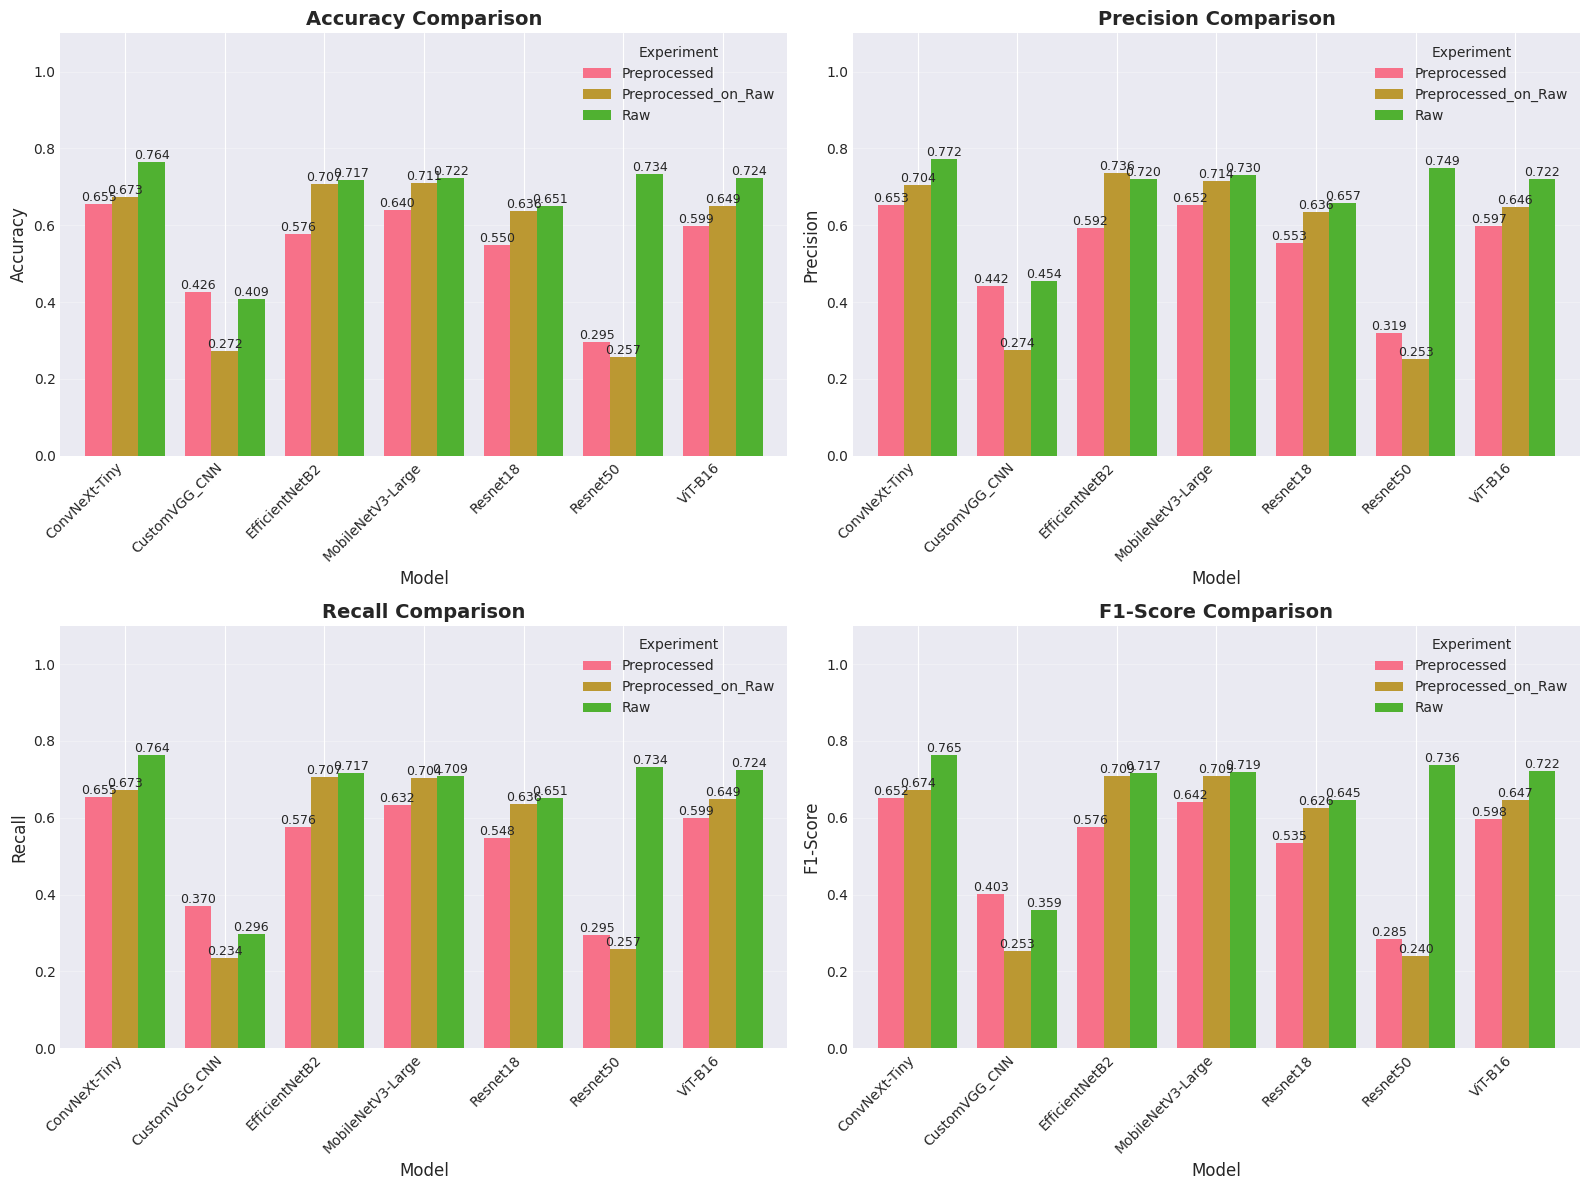

✓ Comparison chart saved as 'model_comparison.png'


In [6]:
# Create comprehensive comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Prepare data for plotting
    pivot_data = df_latest.pivot_table(
        index='model_name',
        columns='experiment_type',
        values=metric
    )
    
    # Create grouped bar chart
    pivot_data.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(f'{title} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(title, fontsize=12)
    ax.set_ylim([0, 1.1])
    ax.legend(title='Experiment', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comparison chart saved as 'model_comparison.png'")

---
## 7. Visualization: Radar Chart for Model Comparison

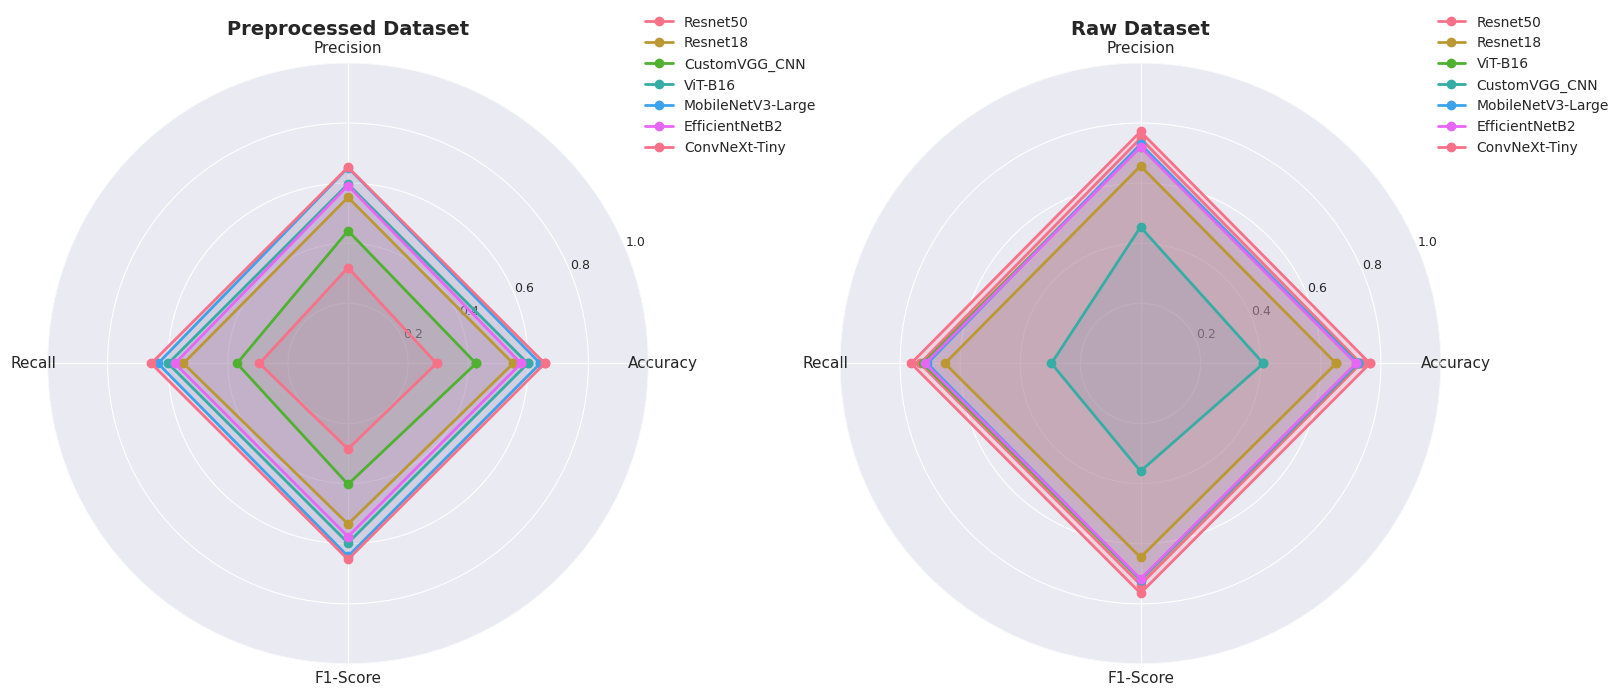

✓ Radar chart saved as 'radar_comparison.png'


In [7]:
from math import pi

# Prepare data for radar chart
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_vars = len(categories)

# Calculate angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Create separate radar charts for Preprocessed and Raw
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), subplot_kw=dict(projection='polar'))

for ax, exp_type in zip([ax1, ax2], ['Preprocessed', 'Raw']):
    exp_data = df_latest[df_latest['experiment_type'] == exp_type]
    
    for _, row in exp_data.iterrows():
        values = [row['accuracy'], row['precision'], row['recall'], row['f1']]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, label=row['model_name'])
        ax.fill(angles, values, alpha=0.15)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=11)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
    ax.set_title(f'{exp_type} Dataset', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
    ax.grid(True)

plt.tight_layout()
plt.savefig('radar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Radar chart saved as 'radar_comparison.png'")

---
## 8. Visualization: Heatmap of All Results

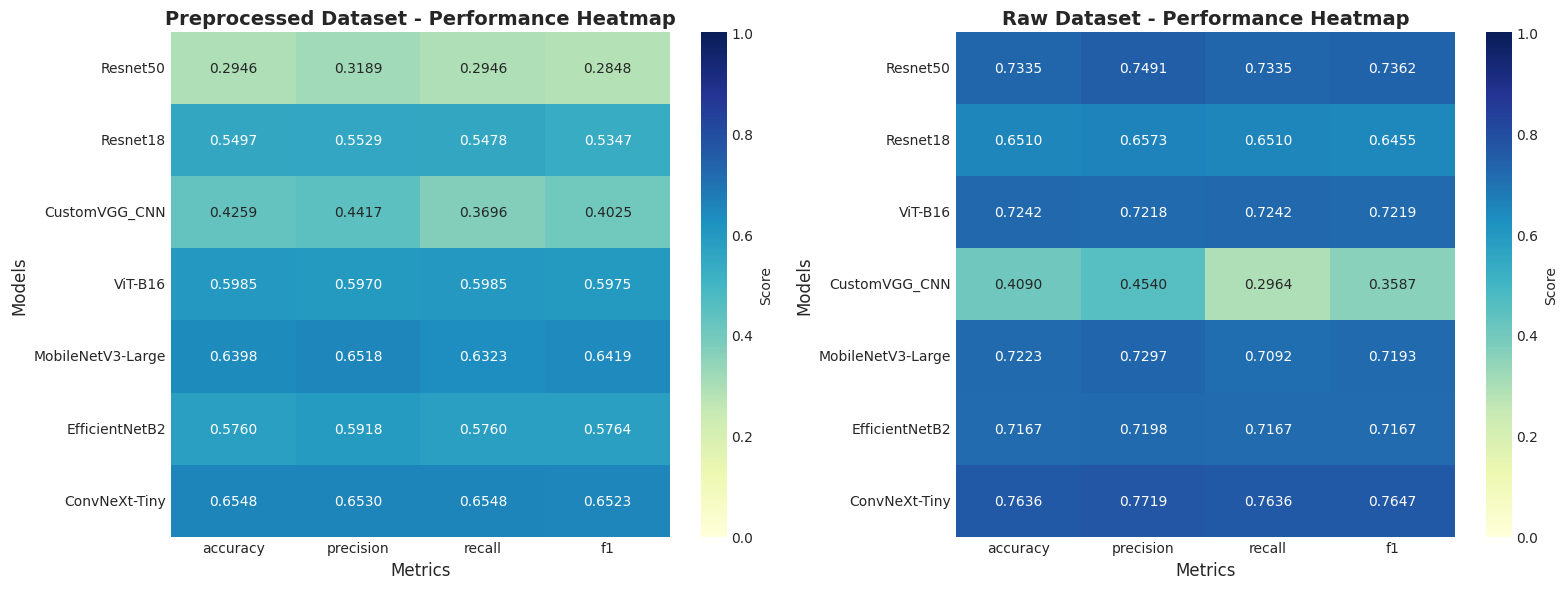

✓ Heatmap saved as 'heatmap_comparison.png'


In [8]:
# Create heatmap showing all metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, exp_type in enumerate(['Preprocessed', 'Raw']):
    exp_data = df_latest[df_latest['experiment_type'] == exp_type]
    heatmap_data = exp_data[['model_name'] + numeric_cols].set_index('model_name')
    
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='.4f',
        cmap='YlGnBu',
        vmin=0,
        vmax=1,
        ax=axes[idx],
        cbar_kws={'label': 'Score'}
    )
    axes[idx].set_title(f'{exp_type} Dataset - Performance Heatmap', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Metrics', fontsize=12)
    axes[idx].set_ylabel('Models', fontsize=12)

plt.tight_layout()
plt.savefig('heatmap_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Heatmap saved as 'heatmap_comparison.png'")

---
## 9. Export Summary Report

In [10]:
# Create summary report
summary_report = df_latest[[
    'model_name', 'experiment_type', 'accuracy', 'precision', 'recall', 'f1', 'loss', 'timestamp'
]].sort_values(['model_name', 'experiment_type'])

# Save to Excel with multiple sheets
with pd.ExcelWriter('waste_classification_report.xlsx', engine='openpyxl') as writer:
    # Sheet 1: Summary
    summary_report.to_excel(writer, sheet_name='Summary', index=False)
    
    # Sheet 2: All Results
    df.to_excel(writer, sheet_name='All Results', index=False)
    
    # Sheet 3: Statistics
    summary_stats.to_excel(writer, sheet_name='Statistics')
    
    # Sheet 4: Comparison Table
    comparison_table.to_excel(writer, sheet_name='Comparison')

print("✓ Excel report saved as 'waste_classification_report.xlsx'")

# Save summary as CSV
summary_report.to_csv('summary_report.csv', index=False)
print("✓ Summary CSV saved as 'summary_report.csv'")

✓ Excel report saved as 'waste_classification_report.xlsx'
✓ Summary CSV saved as 'summary_report.csv'


---
## 10. Generate Markdown Report

In [12]:
# Generate markdown report
markdown_report = f"""
# Waste Classification Model Comparison Report

**Generated:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

**Project:** MMU TCV6313 Waste Classification (Plastic, Aluminum, Paper)

---

## 1. Executive Summary

This report presents a comprehensive comparison of three deep learning models for waste classification:
- **EfficientNetB2** (TensorFlow)
- **ConvNeXt-Tiny** (PyTorch)
- **ViT-B16** (PyTorch)

Each model was evaluated on two datasets:
- **Preprocessed Dataset**: Offline preprocessed images
- **Raw Dataset**: Original unprocessed images

---

## 2. Best Overall Model

- **Model:** {best_model['model_name']}
- **Experiment:** {best_model['experiment_type']}
- **Accuracy:** {best_model['accuracy']:.4f}
- **Precision:** {best_model['precision']:.4f}
- **Recall:** {best_model['recall']:.4f}
- **F1-Score:** {best_model['f1']:.4f}

---

## 3. Results Summary

{summary_report.to_markdown(index=False)}

---

## 4. Key Findings

### Preprocessed vs Raw Dataset
"""

for model in df_latest['model_name'].unique():
    prep_data = df_latest[(df_latest['model_name'] == model) & (df_latest['experiment_type'] == 'Preprocessed')]
    raw_data = df_latest[(df_latest['model_name'] == model) & (df_latest['experiment_type'] == 'Raw')]
    
    if not prep_data.empty and not raw_data.empty:
        prep_acc = prep_data['accuracy'].values[0]
        raw_acc = raw_data['accuracy'].values[0]
        improvement = (prep_acc - raw_acc) * 100
        
        markdown_report += f"""
**{model}:**
- Preprocessed: {prep_acc:.4f}
- Raw: {raw_acc:.4f}
- Improvement: {improvement:+.2f}%
"""

markdown_report += """

---

## 5. Recommendations

Based on the evaluation results:

1. **For Production Deployment:** Use the best overall model for optimal performance
2. **For Resource-Constrained Environments:** Consider the trade-off between accuracy and model size
3. **Data Preprocessing:** The results demonstrate the importance of proper preprocessing

---

## 6. Visualizations

See the following generated charts:
- `model_comparison.png` - Bar charts comparing all metrics
- `radar_comparison.png` - Radar charts for visual comparison
- `heatmap_comparison.png` - Heatmaps showing performance across all metrics

---

*Report generated automatically from training results*
"""

# Save markdown report
with open('FINAL_REPORT.md', 'w') as f:
    f.write(markdown_report)

print("✓ Markdown report saved as 'FINAL_REPORT.md'")
print("\n" + "="*80)
print("ALL REPORTS GENERATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print("  - waste_classification_report.xlsx")
print("  - summary_report.csv")
print("  - FINAL_REPORT.md")
print("  - model_comparison.png")
print("  - radar_comparison.png")
print("  - heatmap_comparison.png")
print("="*80)

✓ Markdown report saved as 'FINAL_REPORT.md'

ALL REPORTS GENERATED SUCCESSFULLY!

Generated files:
  - waste_classification_report.xlsx
  - summary_report.csv
  - FINAL_REPORT.md
  - model_comparison.png
  - radar_comparison.png
  - heatmap_comparison.png
